In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount ('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
datasets = pd.read_csv("/gdrive/My Drive/Colab Notebooks/KNN/car_data.csv")

In [ ]:
datasets.head()

,cnt,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,5000,21,27,13495
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,5000,21,27,16500
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,5000,19,26,16500
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,10.0,102,5500,24,30,13950
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,5500,18,22,17450


In [ ]:
to_check = 'highway_mpg'
print("MIN: ", min(datasets[to_check]) , " MAX: " , max(datasets[to_check]))

MIN:  16  MAX:  54


In [ ]:
to_check = 'fuel_system'
datasets[to_check].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
datasets['make'] = datasets['make'].astype('category').cat.codes
datasets['fuel_type'] = datasets['fuel_type'].astype('category').cat.codes
datasets['aspiration'] = datasets['aspiration'].astype('category').cat.codes
datasets['num_of_doors'] = datasets['num_of_doors'].astype('category').cat.codes
datasets['body_style'] = datasets['body_style'].astype('category').cat.codes
datasets['drive_wheels'] = datasets['drive_wheels'].astype('category').cat.codes
datasets['engine_location'] = datasets['engine_location'].astype('category').cat.codes
datasets['engine_type'] = datasets['engine_type'].astype('category').cat.codes
datasets['num_of_cylinders'] = datasets['num_of_cylinders'].astype('category').cat.codes
datasets['fuel_system'] = datasets['fuel_system'].astype('category').cat.codes

In [ ]:
datasets[to_check].unique()

array([5, 1, 4, 0, 7, 2, 3, 6], dtype=int8)

In [ ]:
datasets.drop('cnt', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X = datasets.drop('price',axis = 1))
scaled_fiter = scaler.transform(X = datasets.drop('price',axis=1))

In [ ]:
df_scaled_fiter = pd.DataFrame(scaled_fiter,columns=datasets.columns[:-1])
df_scaled_fiter.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,-1.948256,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-2.854714,-0.147475,0.074449,0.869568,-0.288349,0.113148,-0.22781,-0.646553,-0.546059
1,-1.948256,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-2.854714,-0.147475,0.074449,0.869568,-0.288349,0.113148,-0.22781,-0.646553,-0.546059
2,-1.948256,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.640035,1.112210,0.604046,0.869568,-0.288349,1.096773,-0.22781,-0.953012,-0.691627
3,-1.788499,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.157864,-0.147475,-0.431076,0.869568,-0.035973,-0.092727,0.78238,-0.186865,-0.109354
4,-1.788499,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,0.230001,0.235942,0.516807,-0.157864,-1.407161,0.218885,0.869568,-0.540725,0.204648,0.78238,-1.106241,-1.273900


In [ ]:
df_scaled_fiter.shape

(205, 21)

In [ ]:
dependent_variable = 'price'
independent_variables = datasets.columns.tolist()

In [ ]:
independent_variables.remove(dependent_variable)
independent_variables

['make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'num_of_cylinders',
 'engine_size',
 'fuel_system',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [ ]:
X = datasets[independent_variables]

y = datasets[dependent_variable]

In [ ]:
X

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,9.0,111,5000,21,27
1,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,9.0,111,5000,21,27
2,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,9.0,154,5000,19,26
3,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,10.0,102,5500,24,30
4,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,9.5,114,5400,23,28
201,21,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,8.7,160,5300,19,25
202,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,8.8,134,5500,18,23
203,21,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,23.0,106,4800,26,27


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.02152328 0.00189846 0.01231024 0.00741921 0.00744473 0.04735243
 0.02566068 0.01766647 0.01911528 0.06211958 0.00879181 0.18614922
 0.00511526 0.0232703  0.2142711  0.02241443 0.00688742 0.08240761
 0.01383047 0.10951534 0.1048367 ]


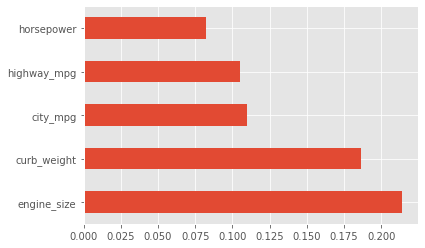

In [ ]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(164, 21)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

n_estimators= [int(X) for X in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators= [int(X) for X in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(X) for X in np.linspace(5,30,num=6)]
min_sample_split = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [ ]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_sample_split,
    'min_samples_leaf' : min_sample_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
     estimator = rf, 
     param_distributions = random_grid,
     scoring='neg_mean_squared_error', 
     n_iter = 10, 
     cv = 5, 
     verbose=2, 
     random_state=42, 
     n_jobs = 1
)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


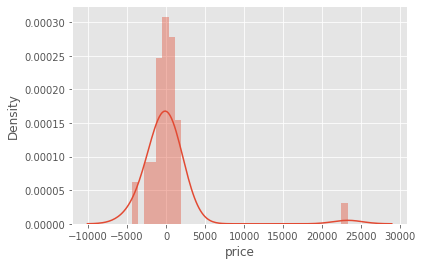

In [ ]:
sns.distplot(y_test-predictions)

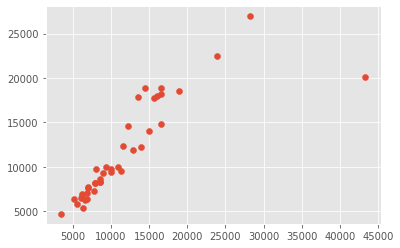

In [ ]:
import matplotlib.pyplot as plot
plot.scatter(y_test,predictions) # positive linear regression :)

In [ ]:
import pickle
file = open('car_datasets_rfr_model.pkl','wb')
pickle.dump(rf_random,file)